# CNN to recognize Rock/Paper/Scissors

In this project, I will be training a convolution neural network to recognize gesture Rock/Paper/Scissors. 

## Loading Rock/Paper/Scissors Dataset


In [12]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2022-07-10 18:41:53--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 172.217.194.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   302MB/s    in 0.6s    

2022-07-10 18:41:54 (302 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2022-07-10 18:41:54--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps

In [13]:
%tensorflow_version 2.8.0
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.autograph.set_verbosity(0)

import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.8.0`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


There are exactly 840 images for each gesture. 

In [14]:
rock_dir = os.path.join('/tmp/rps/rock')

paper_dir = os.path.join('/tmp/rps/paper')

scissors_dir = os.path.join('/tmp/rps/scissors')


print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock06ck02-107.png', 'rock04-017.png', 'rock04-054.png', 'rock04-018.png', 'rock02-062.png', 'rock01-050.png', 'rock01-053.png', 'rock03-071.png', 'rock05ck01-044.png', 'rock06ck02-041.png']
['paper02-035.png', 'paper05-096.png', 'paper01-025.png', 'paper04-050.png', 'paper02-085.png', 'paper02-084.png', 'paper07-021.png', 'paper07-030.png', 'paper01-020.png', 'paper04-084.png']
['scissors02-057.png', 'testscissors03-018.png', 'testscissors01-038.png', 'scissors02-019.png', 'testscissors01-085.png', 'testscissors02-057.png', 'testscissors01-010.png', 'scissors01-085.png', 'scissors03-092.png', 'scissors02-115.png']


In [15]:
import os
import shutil
import numpy as np


original_dataset_dir = '/tmp/rps/'

# The directory where we will
# store our smaller dataset
base_dir = '/tmp/rps_flatten'
if os.path.exists(base_dir):
  shutil.rmtree(base_dir)
os.mkdir(base_dir)

# Creating Train / Val / folders (One time use)
# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir='/tmp/rps-test-set/'


def make_category_dir(dataset_dir, category_name, fnames):
  sub_train_dir = os.path.join(dataset_dir, 'train', category_name)
  os.makedirs(sub_train_dir)
  sub_val_dir = os.path.join(dataset_dir, 'validation', category_name)
  os.makedirs(sub_val_dir)

  train_fs, val_fs = np.split(np.array(fnames),[int(len(fnames)*0.7)])

  for fname in train_fs:
    src = os.path.join(original_dataset_dir, category_name, fname)
    dst = os.path.join(sub_train_dir, fname)
    shutil.copyfile(src, dst)

  for fname in val_fs:
    src = os.path.join(original_dataset_dir, category_name, fname)
    dst = os.path.join(sub_val_dir, fname)
    shutil.copyfile(src, dst)

make_category_dir(base_dir, 'rock', rock_files)
make_category_dir(base_dir, 'paper', paper_files)
make_category_dir(base_dir, 'scissors', scissors_files)


Plotting 2 images from each class.

/tmp/rps/rock/rock06ck02-107.png


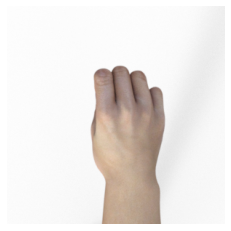

/tmp/rps/rock/rock04-017.png


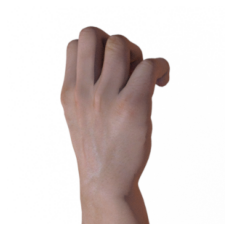

/tmp/rps/paper/paper02-035.png


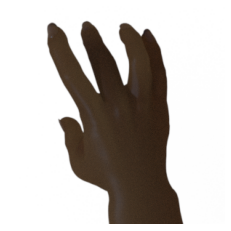

/tmp/rps/paper/paper05-096.png


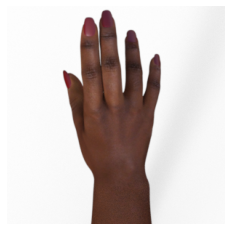

/tmp/rps/scissors/scissors02-057.png


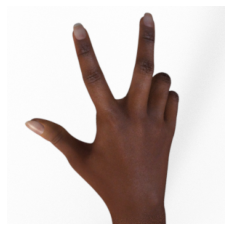

/tmp/rps/scissors/testscissors03-018.png


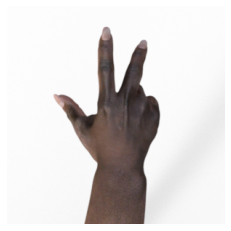

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

## Building a Convolution Neural Network
Considering data augmentation:

In [21]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1/255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=21,
    class_mode='categorical',
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=21,
    class_mode='categorical',
    
)
model2 = models.Sequential()
model2.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(150, 150, 3)))
model2.add(layers.MaxPool2D((2, 2)))
model2.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model2.add(layers.MaxPool2D((2, 2)))
model2.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
model2.add(layers.MaxPool2D((2, 2)))
model2.add(layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu"))
model2.add(layers.MaxPool2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation="relu"))
model2.add(layers.Dense(3, activation="softmax"))

model2.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy']
              )
history = model2.fit_generator(
    train_generator,
    steps_per_epoch=84,
    epochs=6,
    validation_data=validation_generator,
    validation_steps=36,
)

Found 1764 images belonging to 3 classes.
Found 756 images belonging to 3 classes.
Epoch 1/6
84/84 [==============================] - 17s 199ms/step - loss: 1.1214 - accuracy: 0.4019 - val_loss: 0.8999 - val_accuracy: 0.5503
Epoch 2/6
84/84 [==============================] - 21s 255ms/step - loss: 0.8212 - accuracy: 0.6287 - val_loss: 0.2764 - val_accuracy: 0.9048
Epoch 3/6
84/84 [==============================] - 17s 206ms/step - loss: 0.5564 - accuracy: 0.7761 - val_loss: 0.1884 - val_accuracy: 0.9246
Epoch 4/6
84/84 [==============================] - 17s 198ms/step - loss: 0.4353 - accuracy: 0.8209 - val_loss: 0.1024 - val_accuracy: 0.9881
Epoch 5/6
84/84 [==============================] - 17s 207ms/step - loss: 0.3166 - accuracy: 0.8753 - val_loss: 0.2331 - val_accuracy: 0.9392
Epoch 6/6
84/84 [==============================] - 17s 202ms/step - loss: 0.3023 - accuracy: 0.8912 - val_loss: 0.0673 - val_accuracy: 0.9854


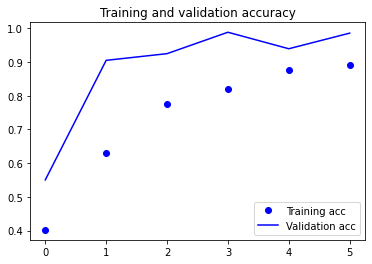

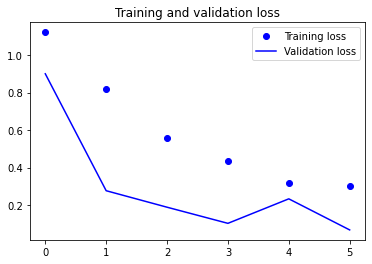

In [22]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
test_datagen= ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=12,
    class_mode="categorical"
)
model2.evaluate_generator(test_generator, 31)

Found 372 images belonging to 3 classes.


[0.08386329561471939, 0.9784946441650391]

The accuracy is pretty good! Almost 98%!

## Try it yourself!
You can now run the following code and use the model to classify images uploaded from your laptop.

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image


uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model2.predict(images, batch_size=10)
  #keras.np_utils.probas_to_classes(y_proba)
  #y_prob = model.predict(x) 
  y_classes = classes.argmax(axis=-1)

  print(fn)
  print(classes)
  print(y_classes)

  class_names = ['paper', 'rock', 'scissor']

  print(class_names[np.argmax(classes)])
